In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, confusion_matrix

In [3]:
ks_projects = pd.read_csv("ks-projects-201801.csv")[['state','backers','usd_pledged_real','usd_goal_real','launched','deadline']]

# convert 'state' to int-like boolean
ks_projects['state'] = (ks_projects['state'] == 'successful').astype(int)

# calculate time limit column
ks_projects['deadline'] = pd.to_datetime(ks_projects['deadline'])
ks_projects['launched'] = pd.to_datetime(ks_projects['launched'])
ks_projects['time_limit'] = (ks_projects['deadline'] - ks_projects['launched']).dt.total_seconds()
# ks_projects.drop(columns=['launched', 'deadline'], inplace=True)

display(ks_projects.head())
# ks_projects.describe()

,state,backers,usd_pledged_real,usd_goal_real,launched,deadline,time_limit
0,0,0,0.0,1533.95,2015-08-11 12:12:28,2015-10-09,5053652.0
1,0,15,2421.0,30000.00,2017-09-02 04:43:57,2017-11-01,5166963.0
2,0,3,220.0,45000.00,2013-01-12 00:20:50,2013-02-26,3886750.0
3,0,1,1.0,5000.00,2012-03-17 03:24:11,2012-04-16,2579749.0
4,0,14,1283.0,19500.00,2015-07-04 08:35:03,2015-08-29,4807497.0


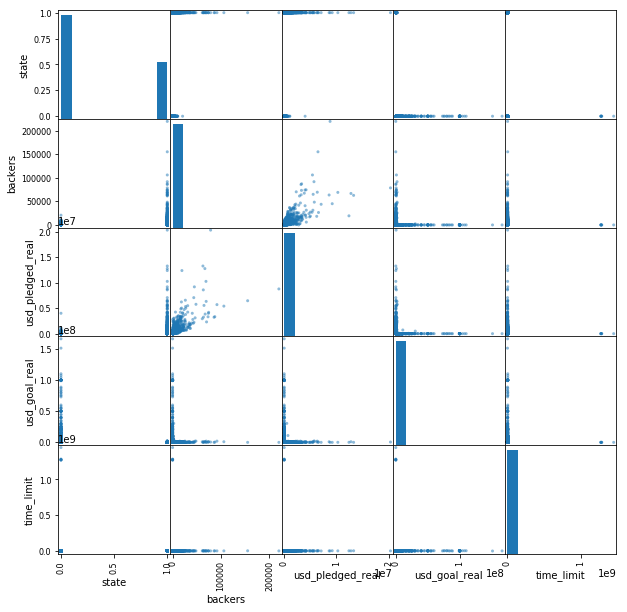

In [60]:
pd.plotting.scatter_matrix(ks_projects, figsize=(10,10))
plt.show()

In [8]:
def linear_ev(regr, X, y):
    # 値を予測
    y_pred = regr.predict(X)

    # MSEを計算
    mse = mean_squared_error(y, y_pred) 
    print("MSE = %s"%round(mse,3) )  

    # MAEを計算
    mae = mean_absolute_error(y, y_pred) 
    print("MAE = %s"%round(mae,3) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    print("RMSE = %s"%round(rmse, 3) )

In [18]:
# linear target: usd_pledged_real
y = ks_projects['usd_pledged_real'].values
X = ks_projects[['backers','usd_goal_real','time_limit']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

x1 = ks_projects['backers'].values
x2 = ks_projects['usd_goal_real'].values
x3 = ks_projects['time_limit'].values

In [19]:
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
linear_ev(regr, X, y)

w0 = 1009.126, w1 = 75.464, w2 = 0.000, w3 = 0.000
MSE = 3589168650.131
MAE = 5891.722
RMSE = 59909.671


In [39]:
# linear target: state
y = ks_projects['state'].values
X = ks_projects[['backers','usd_goal_real','time_limit']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

x1 = ks_projects['backers'].values
x2 = ks_projects['usd_goal_real'].values
x3 = ks_projects['time_limit'].values

In [40]:
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
linear_ev(regr, X, y)

w0 = 0.353, w1 = 0.000, w2 = -0.000, w3 = -0.000
MSE = 0.225
MAE = 0.45
RMSE = 0.474


In [4]:
# logistic target: state
y = ks_projects['state'].values
X = ks_projects[['backers','usd_goal_real','time_limit']].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)
# clf = SGDClassifier(loss='log', penalty='none',tol = 'none', max_iter=10000, fit_intercept=True, random_state=1234)


C:\Users\upc0c\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]

print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

w0 = 2593.580, w1 = 5508796.227, w2 = -26294.758, w3 = -26.371
対数尤度 = -3.097
正答率 = 91.033%


In [8]:
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = successful', '正解 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
conf_mat

,予測 = successful,予測 = failed
正解 = successful,232875,11830
正解 = failed,22123,111833
